In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import FCM, GKFCM

import numpy as np
import math
from random import shuffle
from sklearn import metrics
def scatter_2d(data):
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
    plt.scatter(data[:, 0], data[:, 1], color=colors[1], lw=0)
    plt.xlim(np.min(data[:,0])-0.1*np.min(data[:,0]), np.max(data[:,0])+0.1*np.min(data[:,0]))
    plt.ylim(np.min(data[:,1])-0.1*np.min(data[:,0]), np.max(data[:,1])+0.1*np.min(data[:,0]))
    plt.title('Original data')
    plt.axis('off')
    plt.show()


def generate_2d(clusters, q=1000):
    noise=10
    res = np.empty((q, 2))
    centers = q/5 + np.random.uniform(size=(clusters, 2)) * q*clusters/5
    radiuses = 50 + np.random.uniform(size=clusters) * q/5
    for i in range(q):
        ind = np.random.randint(clusters)
        alpha = np.random.uniform(high=2*math.pi)
        r = np.random.uniform(high=radiuses[ind])
        res[i] = centers[ind] + \
                 np.array([r * math.cos(alpha), r * math.sin(alpha)]) + \
                 np.array([np.random.randint(noise), np.random.randint(noise)])
    return res
def scatter_clusters_data(data,y):
        if data.shape[1] > 2:
            print ("Only 2d data can be plotted!")
            return
        colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow','0.75','0.25','black','0.5']
        for i, xs in enumerate(data):
            xs = np.array(xs)
            plt.scatter(xs[0], xs[1], color=colors[y[i]], lw=0)
        plt.xlim(np.min(data), np.max(data))
        plt.ylim(np.min(data), np.max(data))
        plt.show()


# Generate fake data

Generating sample data with 5 clusters and 500 samples...


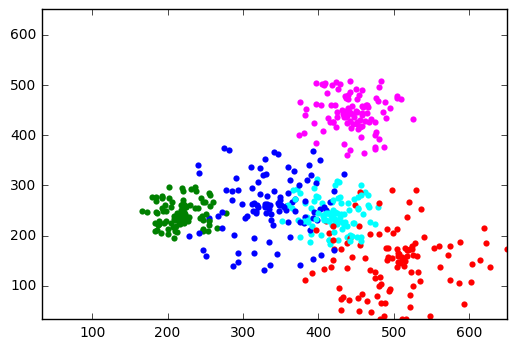

In [2]:
num_clusters = 5
num_samples = 100 * num_clusters # number of samples to generate
print('Generating sample data with {0} clusters and {1} samples...'.format(num_clusters,num_samples))
data,y = FCM.generate_2d(num_clusters, num_samples)
scatter_clusters_data(data,y)

## Fuzzy C-Means

Calculating memberships


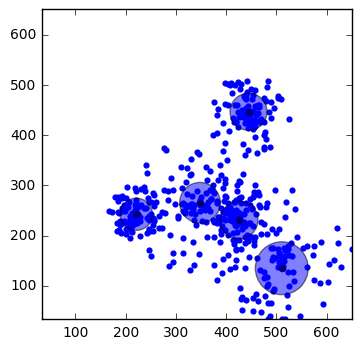

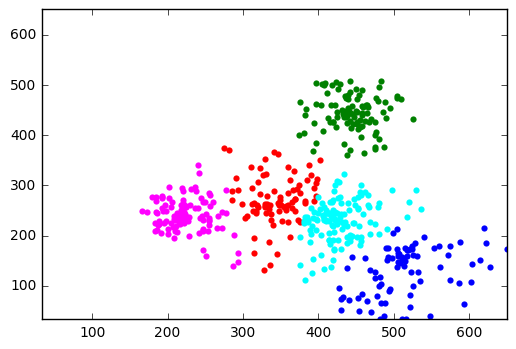

Memberships obtained: [[ 0.01872871  0.02821278  0.79883538  0.11851357  0.03570956]
 [ 0.06508084  0.03416043  0.4502392   0.19982463  0.25069491]
 [ 0.0461061   0.01123287  0.08370532  0.84171975  0.01723597]
 ..., 
 [ 0.32482017  0.0316771   0.15303959  0.43193832  0.05852482]
 [ 0.65790659  0.03799453  0.09020189  0.15714187  0.05675512]
 [ 0.52906466  0.09480896  0.11098291  0.20641889  0.05872458]]
[[ 0  0 82  0  0]
 [ 1  0  0  0 98]
 [72  0  0 13  0]
 [16  0 27 82  0]
 [15 94  0  0  0]]
Cluster 0 has 18.0 incorrect samples classified from 100.0 (accuracy: 82.0%)
Cluster 1 has 2.0 incorrect samples classified from 100.0 (accuracy: 98.0%)
Cluster 2 has 28.0 incorrect samples classified from 100.0 (accuracy: 72.0%)
Cluster 3 has 18.0 incorrect samples classified from 100.0 (accuracy: 82.0%)
Cluster 4 has 6.0 incorrect samples classified from 100.0 (accuracy: 94.0%)
Total accuracy: 85.6
Adjusted rand index: 0.6943865301724527
Silhuette coefficient: 0.48926213738659535


In [3]:
print('Calculating memberships')
fc = FCM.FCM(num_clusters=num_clusters,m=2, plot_level=1,seed=5)
memberships=fc.fit(data)
fc.scatter_clusters_data()
print('Memberships obtained:',memberships)
from sklearn.metrics import confusion_matrix
cross_val=confusion_matrix(fc.results,y)
print(cross_val)
global_acc=0
for i in range(num_clusters):
    correct=num_samples/num_clusters-np.max(cross_val[i])
    total=num_samples/num_clusters
    print('Cluster {0} has {1} incorrect samples classified from {2} (accuracy: {3}%)'.format(i,correct,total,round(100*((total-correct)/total),2)))
    global_acc += np.max(cross_val[i])
print('Total accuracy: {0}'.format(round(100*(global_acc/num_samples),2)))
print('Adjusted rand index: {0}'.format(metrics.adjusted_rand_score(y, fc.results)))
print('Silhuette coefficient: {0}'.format(metrics.silhouette_score(data, fc.results, metric='euclidean')))

## Gustafson-Kessel FCM

Calculating memberships


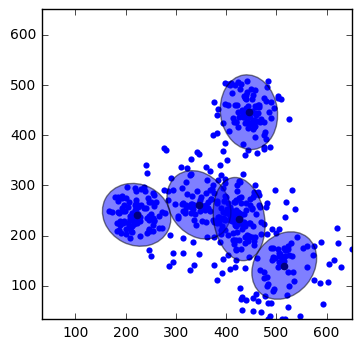

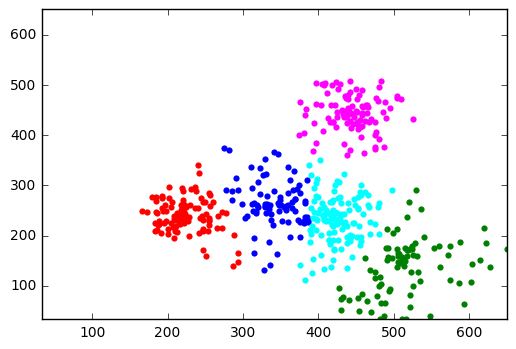

Memberships obtained: [[ 0.71053374  0.02124392  0.04934133  0.17669329  0.04218772]
 [ 0.46594556  0.05661617  0.31039262  0.12904206  0.03800359]
 [ 0.10361575  0.03653273  0.01954002  0.82615808  0.01415342]
 ..., 
 [ 0.16555209  0.2233164   0.05693435  0.52041155  0.03378562]
 [ 0.10112099  0.58273981  0.05752954  0.21434965  0.04426   ]
 [ 0.11105771  0.5846696   0.0643575   0.1354051   0.1045101 ]]
[[71  0  0 14  0]
 [ 0  0 85  0  0]
 [14 94  0  0  0]
 [18  0 24 81  0]
 [ 1  0  0  0 98]]
Cluster 0 has 29.0 incorrect samples classified from 100.0 (accuracy: 71.0%)
Cluster 1 has 15.0 incorrect samples classified from 100.0 (accuracy: 85.0%)
Cluster 2 has 6.0 incorrect samples classified from 100.0 (accuracy: 94.0%)
Cluster 3 has 19.0 incorrect samples classified from 100.0 (accuracy: 81.0%)
Cluster 4 has 2.0 incorrect samples classified from 100.0 (accuracy: 98.0%)
Total accuracy: 85.8
Adjusted rand index: 0.6992439091017185
Silhuette coefficient: 0.47649106295772514


In [4]:
print('Calculating memberships')
fc = GKFCM.GKFCM(num_clusters=num_clusters,m=2, plot_level=1, seed=5)
memberships=fc.fit(data)
fc.scatter_clusters_data()
print('Memberships obtained:',memberships)
from sklearn.metrics import confusion_matrix
cross_val=confusion_matrix(fc.results,y)
print(cross_val)
global_acc = 0
for i in range(num_clusters):
    correct=num_samples/num_clusters-np.max(cross_val[i])
    total=num_samples/num_clusters
    print('Cluster {0} has {1} incorrect samples classified from {2} (accuracy: {3}%)'.format(i,correct,total,round(100*((total-correct)/total),2)))
    global_acc += np.max(cross_val[i])
print('Total accuracy: {0}'.format(round(100*(global_acc/num_samples),2)))   
print('Adjusted rand index: {0}'.format(metrics.adjusted_rand_score(y, fc.results)))
print('Silhuette coefficient: {0}'.format(fc.score))

## K-means

In [5]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=num_clusters, random_state=1).fit(data)
labels = kmeans_model.labels_

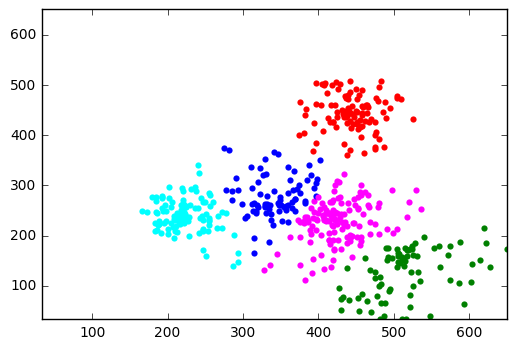

[[68  0  0 11  0]
 [ 0  0 79  0  0]
 [ 1  0  0  0 98]
 [14 94  0  0  0]
 [21  0 30 84  0]]
Cluster 0 has 32.0 incorrect samples classified from 100.0 (accuracy: 68.0%)
Cluster 1 has 21.0 incorrect samples classified from 100.0 (accuracy: 79.0%)
Cluster 2 has 2.0 incorrect samples classified from 100.0 (accuracy: 98.0%)
Cluster 3 has 6.0 incorrect samples classified from 100.0 (accuracy: 94.0%)
Cluster 4 has 16.0 incorrect samples classified from 100.0 (accuracy: 84.0%)
Total accuracy: 84.6
Adjusted rand index: 0.6744332696090998
Silhuette coefficient: 0.49181325218755


In [6]:
scatter_clusters_data(data,labels)
cross_val=confusion_matrix(labels,y)
print(cross_val)
global_acc=0
for i in range(num_clusters):
    correct=num_samples/num_clusters-np.max(cross_val[i])
    total=num_samples/num_clusters
    print('Cluster {0} has {1} incorrect samples classified from {2} (accuracy: {3}%)'.format(i,correct,total,round(100*((total-correct)/total),2)))
    global_acc += np.max(cross_val[i])
print('Total accuracy: {0}'.format(round(100*(global_acc/num_samples),2)))
print('Adjusted rand index: {0}'.format(metrics.adjusted_rand_score(y, labels)))
print('Silhuette coefficient: {0}'.format(metrics.silhouette_score(data, labels, metric='euclidean')))

# Real data: MNIST

Variance: [ 0.12033916  0.09561054]


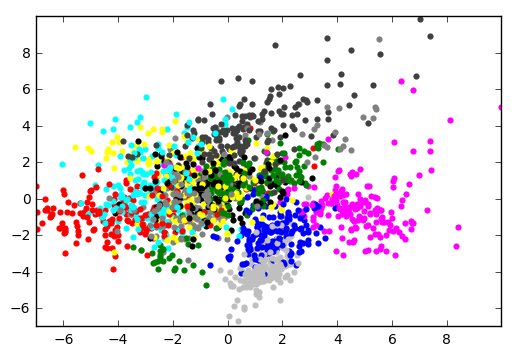

In [7]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

num_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
y = digits.target

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print ('Variance:',pca.explained_variance_ratio_)
scatter_clusters_data(reduced_data,y)

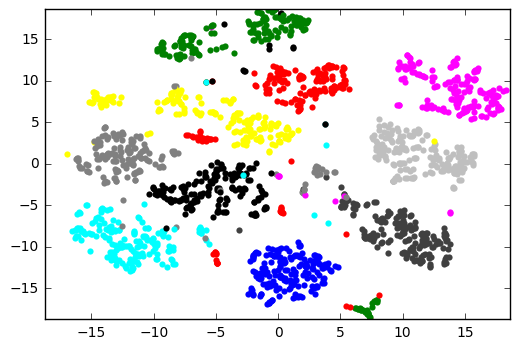

In [8]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
reduced_tsne=model.fit_transform(data) 
scatter_clusters_data(reduced_tsne,y)

## FCM on real data

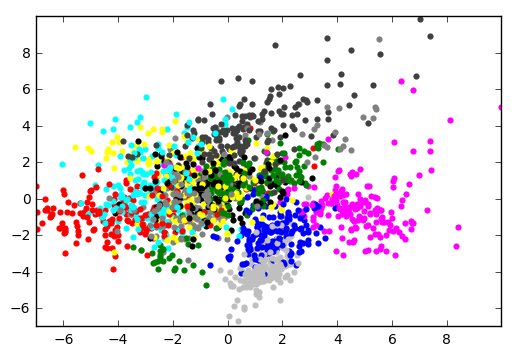

Calculating memberships


/home/aleix/AMLT/new/BaseClustering.py:166: RuntimeWarning: invalid value encountered in double_scalars
  if max_dif < abs(old - self.U[j][i]):


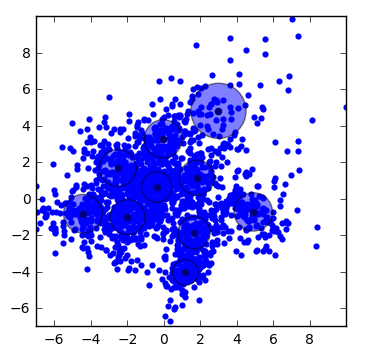

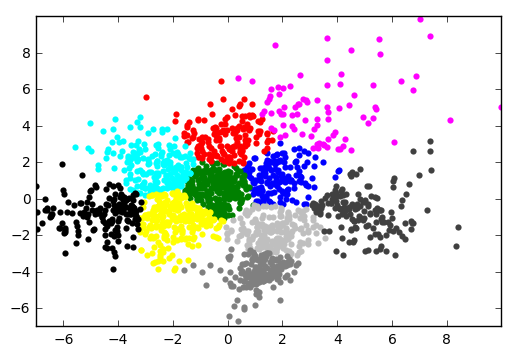

Memberships obtained: [[ 0.11930289  0.06720451  0.02428955 ...,  0.05884766  0.01307988
   0.05243527]
 [ 0.28969906  0.42441951  0.07466407 ...,  0.02082062  0.01567154
   0.01773847]
 [ 0.27781759  0.17598136  0.0451798  ...,  0.05075051  0.02005179
   0.04793526]
 ..., 
 [ 0.28014494  0.24488638  0.04980661 ...,  0.0417219   0.02119081
   0.04223432]
 [ 0.23369449  0.20971589  0.04572977 ...,  0.04541889  0.02189196
   0.049939  ]
 [ 0.04406193  0.10217348  0.02872092 ...,  0.02277728  0.07573394
   0.09913702]]
[[ 10  66   6   0  14  13   1  11  26   7]
 [  2  68   8   7   1  51   0   7  73  44]
 [  0   9   1  15   0  14   0  95   9  11]
 [  0   0  16  69   2  62   0  12  28  17]
 [  0   5   1   0   6   0   0  54   1  18]
 [  2  24  38  45   0  31   0   0  30  74]
 [128   5   0   4   9   7  27   0   5   2]
 [  5   0   0   0 149   1   0   0   0   0]
 [  0   1 107  43   0   3   0   0   2   7]
 [ 31   4   0   0   0   0 153   0   0   0]]
Cluster 0 has 112 incorrect samples classified 

In [9]:
num_clusters = 10

scatter_clusters_data(reduced_data,y)

print('Calculating memberships')
fc = FCM.FCM(num_clusters=num_clusters,plot_level=1,m=2, seed=5)
memberships=fc.fit(reduced_data)
fc.scatter_clusters_data()
print('Memberships obtained:',memberships)
from sklearn.metrics import confusion_matrix
cross_val=confusion_matrix(fc.results,y)
print(cross_val)
global_acc = 0
for i in range(num_clusters):
    print('Cluster {0} has {1} incorrect samples classified from {2} ({3}% accuracy)'.format(i,np.sum(y==i)-np.max(cross_val[i]),np.sum(y==i),round(100*(np.max(cross_val[i])/np.sum(y==i)),2)))
    global_acc += np.max(cross_val[i])
print('Total accuracy: {0}%'.format(round(100*(global_acc/num_samples)),2))
print('Adjusted rand index: {0}'.format(metrics.adjusted_rand_score(y, fc.results)))
print('Silhuette coefficient: {0}'.format(metrics.silhouette_score(reduced_data, fc.results, metric='euclidean')))

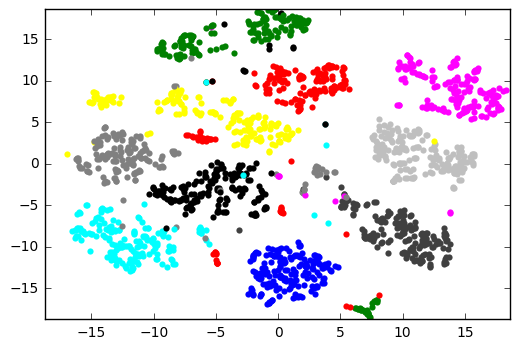

Calculating memberships


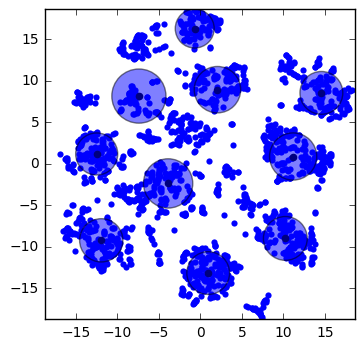

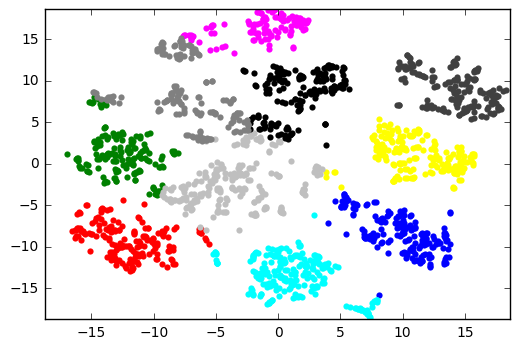

Memberships obtained: [[ 0.03027536  0.01251102  0.0319946  ...,  0.00612143  0.00847793
   0.00853378]
 [ 0.01305062  0.04161064  0.01654836 ...,  0.02512151  0.11222071
   0.17600539]
 [ 0.09451603  0.05168318  0.06694835 ...,  0.0261028   0.0495004
   0.04314269]
 ..., 
 [ 0.0110842   0.06705847  0.03609745 ...,  0.00670811  0.02022366
   0.03597886]
 [ 0.01241391  0.62057661  0.12087727 ...,  0.00822574  0.021554
   0.05504353]
 [ 0.01541991  0.04209307  0.05084746 ...,  0.00702715  0.01701002
   0.0232065 ]]
[[  0   0   2   1   4   0   0 175   0   1]
 [  0   0   0   0   0  17   0   0  11 140]
 [  0   0   0 175   0   0   0   0   1   4]
 [178  27  13   1   0   0   0   0   0   0]
 [  0 111   0   0   1   0   0   0   7   0]
 [  0   0   0   0   0   1 181   2   0   4]
 [  0   0  12   3   4  29   0   2 149  28]
 [  0   0   0   0 172   0   0   0   0   0]
 [  0   0 127   2   0  36   0   0   4   0]
 [  0  44  23   1   0  99   0   0   2   3]]
Cluster 0 has 3 incorrect samples classified from 

In [10]:
# FCM with t-sne instead of PCA
num_clusters = 10

scatter_clusters_data(reduced_tsne,y)

print('Calculating memberships')
fc = FCM.FCM(num_clusters=num_clusters,plot_level=1,m=2, seed=5)
memberships=fc.fit(reduced_tsne)
fc.scatter_clusters_data()
print('Memberships obtained:',memberships)
from sklearn.metrics import confusion_matrix
cross_val=confusion_matrix(fc.results,y)
print(cross_val)
global_acc = 0
for i in range(num_clusters):
    print('Cluster {0} has {1} incorrect samples classified from {2} ({3}% accuracy)'.format(i,np.sum(y==i)-np.max(cross_val[i]),np.sum(y==i),round(100*(np.max(cross_val[i])/np.sum(y==i)),2)))
    global_acc += np.max(cross_val[i])
print('Total accuracy: {0}%'.format(round(100*(global_acc/num_samples)),2))
print('Adjusted rand index: {0}'.format(metrics.adjusted_rand_score(y, fc.results)))
print('Silhuette coefficient: {0}'.format(metrics.silhouette_score(reduced_tsne, fc.results, metric='euclidean')))

## GKFCM on real data

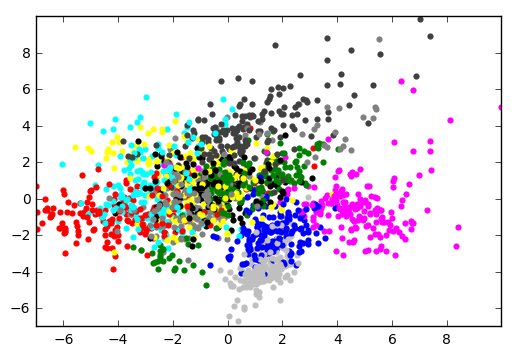

Calculating memberships


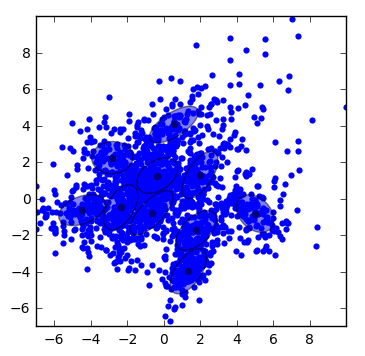

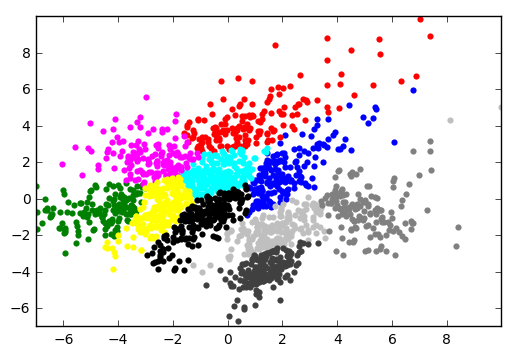

Memberships obtained: [[ 0.09265063  0.01383571  0.00739113 ...,  0.06182387  0.04039216
   0.04166985]
 [ 0.18126926  0.02948006  0.02619246 ...,  0.01564955  0.2361636
   0.02510048]
 [ 0.40213868  0.0275728   0.01545596 ...,  0.04685824  0.15067715
   0.0464181 ]
 ..., 
 [ 0.409405    0.02797447  0.01581505 ...,  0.03426475  0.21540026
   0.03620579]
 [ 0.37260288  0.02971506  0.01591358 ...,  0.04443257  0.19138542
   0.04098376]
 [ 0.07279516  0.05205113  0.01563144 ...,  0.04243835  0.49193633
   0.01679638]]
[[ 12  74   7   0  11  11   0  16  24  20]
 [  0   0  97  41   0   1   0   0   2   7]
 [  0   3   1  12   1   4   0 125   1  14]
 [  0  53   6   7   2  44   0  26  61  23]
 [  0   0   7  52   2  54   0  11  14   7]
 [  0   2  48  52   0  26   0   1  26  46]
 [123   2   0   3  22   7  23   0   2   1]
 [ 38   1   0   0   0   0 158   0   0   0]
 [  4  47  11  16   0  34   0   0  44  62]
 [  1   0   0   0 143   1   0   0   0   0]]
Cluster 0 has 104 incorrect samples classified f

In [11]:
num_clusters = 10

scatter_clusters_data(reduced_data,y)

print('Calculating memberships')
fc = GKFCM.GKFCM(num_clusters=num_clusters,m=2,plot_level=1, seed=5)
memberships=fc.fit(reduced_data)
fc.scatter_clusters_data()
print('Memberships obtained:',memberships)
from sklearn.metrics import confusion_matrix
cross_val=confusion_matrix(fc.results,y)
print(cross_val)
global_acc = 0
for i in range(num_clusters):
    print('Cluster {0} has {1} incorrect samples classified from {2} ({3}% accuracy)'.format(i,np.sum(y==i)-np.max(cross_val[i]),np.sum(y==i),round(100*(np.max(cross_val[i])/np.sum(y==i)),2)))
    global_acc += np.max(cross_val[i])
print('Total accuracy: {0}%'.format(round(100*(global_acc/num_samples)),2))
print('Adjusted rand index: {0}'.format(metrics.adjusted_rand_score(y, fc.results)))
print('Silhuette coefficient: {0}'.format(metrics.silhouette_score(reduced_data, fc.results, metric='euclidean')))

## GKFCM with t-sne

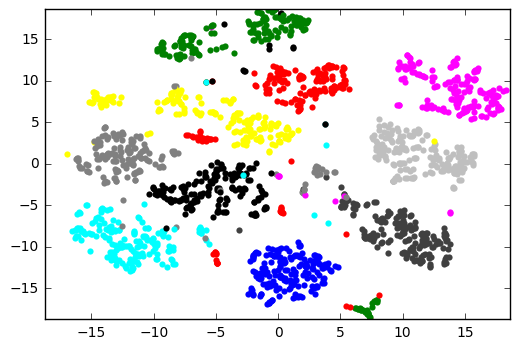

Calculating memberships


/home/aleix/AMLT/new/BaseClustering.py:166: RuntimeWarning: invalid value encountered in double_scalars
  if max_dif < abs(old - self.U[j][i]):


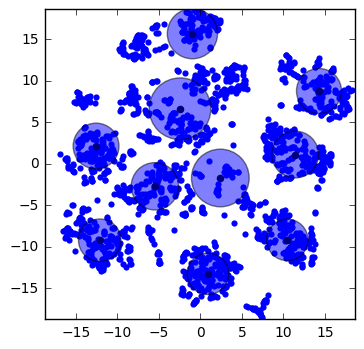

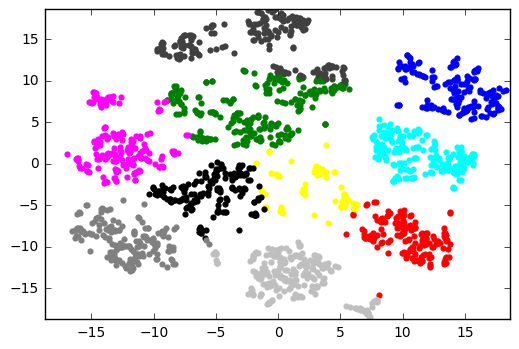

Memberships obtained: [[ 0.00569926  0.00984321  0.02766127 ...,  0.00484919  0.02772113
   0.02904166]
 [ 0.02730988  0.12834431  0.01347044 ...,  0.66163396  0.03415008
   0.01735486]
 [ 0.01939072  0.05025858  0.06642286 ...,  0.01733759  0.19561588
   0.04822178]
 ..., 
 [ 0.00261734  0.01710571  0.00413278 ...,  0.00417661  0.90421428
   0.01360564]
 [ 0.01021514  0.05142907  0.01486042 ...,  0.01894375  0.21543427
   0.14820429]
 [ 0.00498096  0.02112216  0.01045974 ...,  0.0064114   0.8178727
   0.0345466 ]]
[[  0   0   0   0 172   0   0   0   0   0]
 [  0   0 110   2   0 139   0   0   6   2]
 [  0   0   2   0   2   0   0 158   0   0]
 [  0   0   0   0   0   1 181   0   0   1]
 [  0   0   2   0   0  40   0   0   0 140]
 [  0   0  10   3   6   2   0  20   9  30]
 [178  27  13   0   0   0   0   0   0   0]
 [  0 155  40   0   1   0   0   0   7   1]
 [  0   0   0  11   0   0   0   1 151   3]
 [  0   0   0 167   0   0   0   0   1   3]]
Cluster 0 has 6 incorrect samples classified fro

In [12]:
num_clusters = 10

scatter_clusters_data(reduced_tsne,y)

print('Calculating memberships')
fc = FCM.FCM(num_clusters=num_clusters,plot_level=1,m=2, seed=5)
memberships=fc.fit(reduced_tsne)
fc.scatter_clusters_data()
print('Memberships obtained:',memberships)
from sklearn.metrics import confusion_matrix
cross_val=confusion_matrix(fc.results,y)
print(cross_val)
global_acc = 0
for i in range(num_clusters):
    print('Cluster {0} has {1} incorrect samples classified from {2} ({3}% accuracy)'.format(i,np.sum(y==i)-np.max(cross_val[i]),np.sum(y==i),round(100*(np.max(cross_val[i])/np.sum(y==i)),2)))
    global_acc += np.max(cross_val[i])
print('Total accuracy: {0}%'.format(round(100*(global_acc/num_samples)),2))
print('Adjusted rand index: {0}'.format(metrics.adjusted_rand_score(y, fc.results)))
print('Silhuette coefficient: {0}'.format(metrics.silhouette_score(reduced_tsne, fc.results, metric='euclidean')))

## K-means on real data

In [13]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=num_clusters, random_state=1).fit(reduced_data)
labels = kmeans_model.labels_

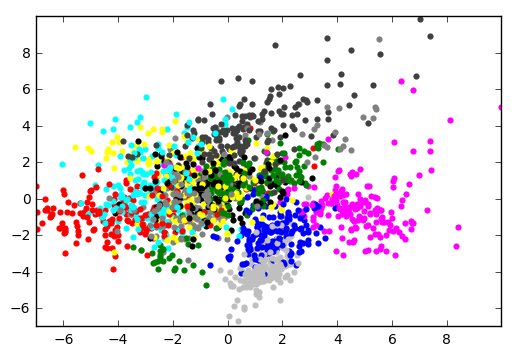

[[  5   0   0   0 147   1   0   0   0   0]
 [  2  69  11   7   1  56   0   9  77  54]
 [ 40   2   0   0   0   0 160   0   0   0]
 [  2  27  35  42   0  27   0   0  29  65]
 [  0   5   1  15   0  12   0 103   9  11]
 [  0   0  16  76   2  63   0  12  26  16]
 [  5  72   6   0  11  11   1  12  22   9]
 [  0   0 107  39   0   2   0   0   2   7]
 [  0   0   0   0   7   0   0  43   0  15]
 [124   7   1   4  13  10  20   0   9   3]]
Cluster 0 has 31 incorrect samples classified from 178 (82.58% accuracy)
Cluster 1 has 105 incorrect samples classified from 182 (42.31% accuracy)
Cluster 2 has 17 incorrect samples classified from 177 (90.4% accuracy)
Cluster 3 has 118 incorrect samples classified from 183 (35.52% accuracy)
Cluster 4 has 78 incorrect samples classified from 181 (56.91% accuracy)
Cluster 5 has 106 incorrect samples classified from 182 (41.76% accuracy)
Cluster 6 has 109 incorrect samples classified from 181 (39.78% accuracy)
Cluster 7 has 72 incorrect samples classified from 179 

In [14]:
cross_val=confusion_matrix(labels,y)
scatter_clusters_data(reduced_data,y)
print(cross_val)
global_acc=0
for i in range(num_clusters):
    incorrect=np.sum(y==i)-np.max(cross_val[i])
    total=np.sum(y==i)
    print('Cluster {0} has {1} incorrect samples classified from {2} ({3}% accuracy)'.format(i,incorrect,total,round(100*(np.max(cross_val[i])/np.sum(y==i)),2)))
    global_acc += np.max(cross_val[i])
print('Global accuracy: {0}'.format(round(100*(global_acc/len(labels)),2)))
print('Adjusted rand index: {0}'.format(metrics.adjusted_rand_score(y, labels)))
print('Silhuette coefficient: {0}'.format(metrics.silhouette_score(reduced_data, labels, metric='euclidean')))

In [15]:
#TSNE KMEANS
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=num_clusters, random_state=1).fit(reduced_tsne)
labels = kmeans_model.labels_

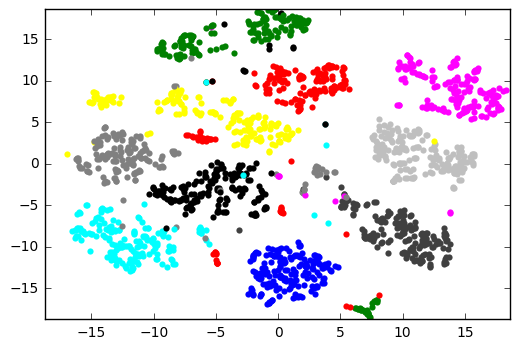

[[  0   0  25   1   0 143   0   0   2   2]
 [  0   0  10   2   4   2   0   3 137  29]
 [  0   0   0   0   0   1 181   0   0   3]
 [  0   0   5 177   0   0   0   0  21   4]
 [178  27   9   0   0   0   0   0   0   0]
 [  0   0   1   1   4   0   0 176   0   1]
 [  0 155   0   0   1   0   0   0  10   1]
 [  0   0   0   0 172   0   0   0   0   0]
 [  0   0   0   0   0  35   0   0   3 140]
 [  0   0 127   2   0   1   0   0   1   0]]
Cluster 0 has 35 incorrect samples classified from 178 (80.34% accuracy)
Cluster 1 has 45 incorrect samples classified from 182 (75.27% accuracy)
Cluster 2 has -4 incorrect samples classified from 177 (102.26% accuracy)
Cluster 3 has 6 incorrect samples classified from 183 (96.72% accuracy)
Cluster 4 has 3 incorrect samples classified from 181 (98.34% accuracy)
Cluster 5 has 6 incorrect samples classified from 182 (96.7% accuracy)
Cluster 6 has 26 incorrect samples classified from 181 (85.64% accuracy)
Cluster 7 has 7 incorrect samples classified from 179 (96.09%

In [16]:
cross_val=confusion_matrix(labels,y)
scatter_clusters_data(reduced_tsne,y)
print(cross_val)
global_acc=0
for i in range(num_clusters):
    incorrect=np.sum(y==i)-np.max(cross_val[i])
    total=np.sum(y==i)
    print('Cluster {0} has {1} incorrect samples classified from {2} ({3}% accuracy)'.format(i,incorrect,total,round(100*(np.max(cross_val[i])/np.sum(y==i)),2)))
    global_acc += np.max(cross_val[i])
print('Global accuracy: {0}'.format(round(100*(global_acc/len(labels)),2)))
print('Adjusted rand index: {0}'.format(metrics.adjusted_rand_score(y, labels)))
print('Silhuette coefficient: {0}'.format(metrics.silhouette_score(reduced_tsne, labels, metric='euclidean')))

## Test on MRI image

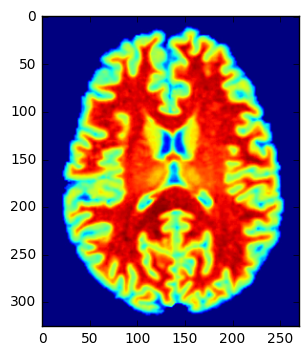

Flattened image: (88020, 1)


In [17]:
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
file_name='mri_test.png'
img = color.rgb2gray(io.imread(file_name));
x_orig,y_orig=img.shape
plt.imshow(img)
plt.savefig('intensity_mri.png')
plt.show()
img_flat = np.reshape(img, (-1, 1))
print('Flattened image:',img_flat.shape)

## FCM

In [18]:
import FCM
num_clusters = 3

#scatter_2d(reduced_data)
reduced_data = img_flat
print('Calculating memberships')
fc = FCM.FCM(num_clusters=num_clusters,m=2, seed=5)
memberships=fc.fit(reduced_data)

print('Memberships obtained:',memberships)
print('Memberships shape:',memberships.shape)

Calculating memberships
Memberships obtained: [[ 0.0001      0.00026673  0.99963328]
 [ 0.0001      0.00026673  0.99963328]
 [ 0.0001      0.00026673  0.99963328]
 ..., 
 [ 0.0001      0.00026673  0.99963328]
 [ 0.0001      0.00026673  0.99963328]
 [ 0.0001      0.00026673  0.99963328]]
Memberships shape: (88020, 3)


In [19]:
segmented_image=[]
for i in range(len(memberships)):
    segmented_image.append(np.argmax(memberships[i]))
segmented_image=np.reshape(segmented_image,(x_orig,y_orig))

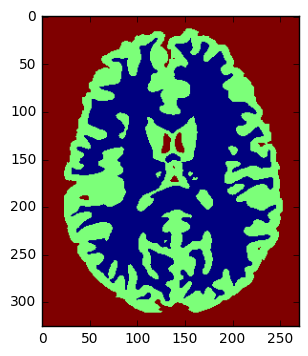

In [20]:
plt.imshow(segmented_image)
plt.savefig('img/segmented_image_FCM.png')
plt.show()